## Init

In [3]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('Geometry Viewer')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        #print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

In [2]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


## Comparison

In [161]:
topas = np.load('OSSART_topas_simulation_hi-res_noise_reduced_W.npy')
fastCat = np.load('/home/xcite/fastCAT/xpecgen/data/recons/W_25_CWO_projections_smaller.npy')#fastCat_topas_equiv_8cm_W.npy')

<IPython.core.display.Javascript object>


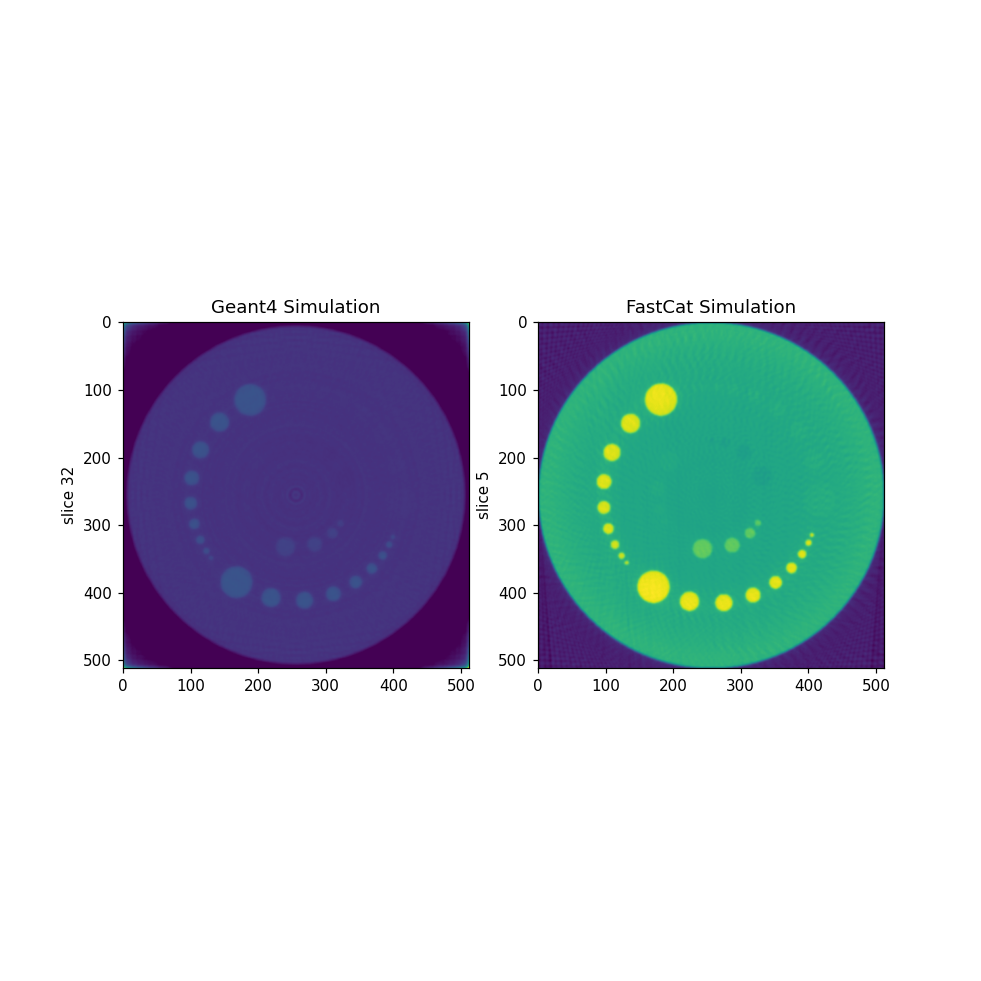

In [162]:
fig = plt.figure(figsize=[9,9])

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

tracker1 = IndexTracker(ax1, topas)#transpose([0,2,1]))
tracker2 = IndexTracker(ax2, fastCat.T)


fig.canvas.mpl_connect('scroll_event', tracker2.onscroll)
fig.canvas.mpl_connect('scroll_event', tracker1.onscroll)
ax1.set_title('Geant4 Simulation')
plt.title('FastCat Simulation')
plt.show()

## Analyse script

In [163]:
import astropy.stats as stats

In [164]:
    def analyse_515(recon_slice):

        def create_mask(shape):

            im = np.zeros(shape)
            ii = 1

            # CTMAT(x) formel=H2O dichte=x
            LEN = 100

            A0  = 87.7082*np.pi/180
            A1 = 108.3346*np.pi/180
            A2 = 126.6693*np.pi/180
            A3 = 142.7121*np.pi/180
            A4 = 156.4631*np.pi/180
            A5 = 167.9223*np.pi/180
            A6 = 177.0896*np.pi/180
            A7 = 183.9651*np.pi/180
            A8 = 188.5487*np.pi/180

            B0 = 110.6265*np.pi/180
            B1 = 142.7121*np.pi/180
            B2 = 165.6304*np.pi/180
            B3 = 179.3814*np.pi/180

            tad = 0.2

            # Phantom 
            # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
            create_circular_mask(x= 0.000,  y= 0.000,  r=-tad + 2.0, index = ii, image = im)

            ii += 1

            # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= 5*cos(A0),  y= 5*sin(A0),  r=-tad + 0.75, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A1),  y= 5*sin(A1),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A2),  y= 5*sin(A2),  r=-tad + 0.40, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A3),  y= 5*sin(A3),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A4),  y= 5*sin(A4),  r=-tad + 0.30, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A5),  y= 5*sin(A5),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A6),  y= 5*sin(A6),  r=-tad + 0.20, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A7),  y= 5*sin(A7),  r=-tad + 0.15, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A8),  y= 5*sin(A8),  r=-tad + 0.10, index = ii, image = im); ii += 1


            # ++++ supra-slice 0.3% targets +++++++++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= 5*cos(A0+2/3*np.pi),  y= 5*sin(A0+2/3*np.pi),  r=-tad + 0.75, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A1+2/3*np.pi),  y= 5*sin(A1+2/3*np.pi),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A2+2/3*np.pi),  y= 5*sin(A2+2/3*np.pi),  r=-tad + 0.40, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A3+2/3*np.pi),  y= 5*sin(A3+2/3*np.pi),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A4+2/3*np.pi),  y= 5*sin(A4+2/3*np.pi),  r=-tad + 0.30, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A5+2/3*np.pi),  y= 5*sin(A5+2/3*np.pi),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A6+2/3*np.pi),  y= 5*sin(A6+2/3*np.pi),  r=-tad + 0.20, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A7+2/3*np.pi),  y= 5*sin(A7+2/3*np.pi),  r=-tad + 0.15, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A8+2/3*np.pi),  y= 5*sin(A8+2/3*np.pi),  r=-tad + 0.10, index = ii, image = im); ii += 1


            # ++++ supra-slice 0.5% targets +++++++++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= 5*cos(A0+4/3*np.pi),  y= 5*sin(A0+4/3*np.pi),  r=-tad + 0.75, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A1+4/3*np.pi),  y= 5*sin(A1+4/3*np.pi),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A2+4/3*np.pi),  y= 5*sin(A2+4/3*np.pi),  r=-tad + 0.40, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A3+4/3*np.pi),  y= 5*sin(A3+4/3*np.pi),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A4+4/3*np.pi),  y= 5*sin(A4+4/3*np.pi),  r=-tad + 0.30, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A5+4/3*np.pi),  y= 5*sin(A5+4/3*np.pi),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A6+4/3*np.pi),  y= 5*sin(A6+4/3*np.pi),  r=-tad + 0.20, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A7+4/3*np.pi),  y= 5*sin(A7+4/3*np.pi),  r=-tad + 0.15, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A8+4/3*np.pi),  y= 5*sin(A8+4/3*np.pi),  r=-tad + 0.10, index = ii, image = im); ii += 1

            # ++++ subslice 1.0% targets 7mm long +++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= 2.5*cos(B0),  y= 2.5*sin(B0),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B1),  y= 2.5*sin(B1),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B2),  y= 2.5*sin(B2),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B3),  y= 2.5*sin(B3),  r=-tad + 0.15, index = ii, image = im); ii += 1


            # ++++ subslice 1.0% targets 3mm long +++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= 2.5*cos(B0+2/3*np.pi) ,y= 2.5*sin(B0+2/3*np.pi),  r=-tad + 0.45  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B1+2/3*np.pi) ,y= 2.5*sin(B1+2/3*np.pi),  r=-tad + 0.35  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B2+2/3*np.pi) ,y= 2.5*sin(B2+2/3*np.pi),  r=-tad + 0.25  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B3+2/3*np.pi) ,y= 2.5*sin(B3+2/3*np.pi),  r=-tad + 0.15  , index = ii, image = im); ii += 1


            # ++++ subslice 1.0% targets 5mm long +++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= 2.5*cos(B0+4/3*np.pi) ,y= 2.5*sin(B0+4/3*np.pi),  r=-tad + 0.45  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B1+4/3*np.pi) ,y= 2.5*sin(B1+4/3*np.pi),  r=-tad + 0.35  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B2+4/3*np.pi) ,y= 2.5*sin(B2+4/3*np.pi),  r=-tad + 0.25  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B3+4/3*np.pi) ,y= 2.5*sin(B3+4/3*np.pi),  r=-tad + 0.15  , index = ii, image = im); ii += 1

            return im

        def create_mask_multi(shape):

            im = np.zeros(shape)
            ii = 1

            # CTMAT(x) formel=H2O dichte=x
            LEN = 100

            A0  = 87.7082*np.pi/180
            A1 = 108.3346*np.pi/180
            A2 = 126.6693*np.pi/180
            A3 = 142.7121*np.pi/180
            A4 = 156.4631*np.pi/180
            A5 = 167.9223*np.pi/180
            A6 = 177.0896*np.pi/180
            A7 = 183.9651*np.pi/180
            A8 = 188.5487*np.pi/180
            B0 = 110.6265*np.pi/180
            B1 = 142.7121*np.pi/180
            B2 = 165.6304*np.pi/180
            B3 = 179.3814*np.pi/180

            # Phantom 
            # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
            create_circular_mask(x= 0.000,  y= 0.000,  r=1.5, index = ii, image = im)

            ii += 1

            tad = 0.2
            # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */

            create_circular_mask(x= 5*cos(A0),  y= 5*sin(A0),  r=0.75 - tad, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A0+2/3*np.pi),  y= 5*sin(A0+2/3*np.pi),  r=0.75 - tad, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A0+4/3*np.pi),  y= 5*sin(A0+4/3*np.pi),  r=0.75 - tad, index = ii, image = im); ii += 1

            create_circular_mask(x= 2.5*cos(B0),  y= 2.5*sin(B0),  r=0.45 - tad, index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B0+2/3*np.pi) ,y= 2.5*sin(B0+2/3*np.pi),  r=0.45 - tad  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B0+4/3*np.pi) ,y= 2.5*sin(B0+4/3*np.pi),  r=0.45 - tad  , index = ii, image = im); ii += 1       
            return im

        def create_circular_mask(x, y, r, index, image):
        
            h,w = image.shape
            
            center = [x*int(w/2)/8 + int(w/2),y*int(h/2)/8 + int(h/2)]

            if center is None: # use the middle of the image
                center = (int(w/2), int(h/2))
            if r is None: # use the smallest distance between the center and image walls
                radius = min(center[0], center[1], w-center[0], h-center[1])

            Y, X = np.ogrid[:h, :w]
            dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

            mask = dist_from_center <= r*int(w/2)/8
            
            
            image[mask] = index

        im = create_mask(recon_slice.shape)

        contrast = []
        noise = []
        cnr = []

        ii = 1

        ref_mean = np.mean(recon_slice[im == ii])
        ref_std = np.std(recon_slice[im == ii])
        print(ref_mean)

        ci = []

        for ii in range(2,int(np.max(im)+1)):
            
            if len(recon_slice[im == ii]) > 0:
                
                contrast.append(np.abs(np.mean(recon_slice[im == ii])- ref_mean))
                noise.append(np.std(recon_slice[im == ii]))

                ci.append(np.std(np.abs(stats.bootstrap(recon_slice[im == ii],100,bootfunc=np.mean) - ref_mean)))

                cnr.append(contrast[-1]/(np.sqrt(noise[-1]**2)))
                      
        ci_v = [(ci[ii]/ref_mean)*100 for ii in range(len(ci))]
            
        rs = np.linspace(0.1,0.45,8)

        return_im = True

        if return_im:
            return rs, [(contrast[ii]/ref_mean)*100 for ii in range(len(contrast))], cnr, ci_v, im
        else:
            return rs, [(contrast[ii]/ref_mean)*100 for ii in range(len(contrast))], cnr, ci_v

In [165]:
    def analyse_515_8cm(recon_slice):

        def create_mask(shape):

            im = np.zeros(shape)
            ii = 1
            
            offset = 0.1
            
            first_radius = 5 - offset
            second_radius = 2.5 - offset
            
            correction = -2*np.pi/180
            # CTMAT(x) formel=H2O dichte=x
            LEN = 100

            A0  = 87.7082*np.pi/180 + correction
            A1 = 108.3346*np.pi/180 + correction
            A2 = 126.6693*np.pi/180 + correction
            A3 = 142.7121*np.pi/180 + correction
            A4 = 156.4631*np.pi/180 + correction
            A5 = 167.9223*np.pi/180 + correction
            A6 = 177.0896*np.pi/180 + correction
            A7 = 183.9651*np.pi/180 + correction
            A8 = 188.5487*np.pi/180 + correction

            B0 = 110.6265*np.pi/180 + correction
            B1 = 142.7121*np.pi/180 + correction
            B2 = 165.6304*np.pi/180 + correction
            B3 = 179.3814*np.pi/180 + correction

            tad = 0.2

            # Phantom 
            # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
            create_circular_mask(x= 0.000,  y= 0.000,  r=-tad + 2, index = ii, image = im)

            ii += 1

            # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= first_radius*cos(A0),  y= first_radius*sin(A0),  r=-tad + 0.75, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A1),  y= first_radius*sin(A1),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A2),  y= first_radius*sin(A2),  r=-tad + 0.40, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A3),  y= first_radius*sin(A3),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A4),  y= first_radius*sin(A4),  r=-tad + 0.30, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A5),  y= first_radius*sin(A5),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A6),  y= first_radius*sin(A6),  r=-tad + 0.20, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A7),  y= first_radius*sin(A7),  r=-tad + 0.15, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A8),  y= first_radius*sin(A8),  r=-tad + 0.10, index = ii, image = im); ii += 1


            # ++++ supra-slice 0.3% targets +++++++++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= first_radius*cos(A0+2/3*np.pi),  y= first_radius*sin(A0+2/3*np.pi),  r=-tad + 0.75, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A1+2/3*np.pi),  y= first_radius*sin(A1+2/3*np.pi),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A2+2/3*np.pi),  y= first_radius*sin(A2+2/3*np.pi),  r=-tad + 0.40, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A3+2/3*np.pi),  y= first_radius*sin(A3+2/3*np.pi),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A4+2/3*np.pi),  y= first_radius*sin(A4+2/3*np.pi),  r=-tad + 0.30, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A5+2/3*np.pi),  y= first_radius*sin(A5+2/3*np.pi),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A6+2/3*np.pi),  y= first_radius*sin(A6+2/3*np.pi),  r=-tad + 0.20, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A7+2/3*np.pi),  y= first_radius*sin(A7+2/3*np.pi),  r=-tad + 0.15, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A8+2/3*np.pi),  y= first_radius*sin(A8+2/3*np.pi),  r=-tad + 0.10, index = ii, image = im); ii += 1


            # ++++ supra-slice 0.5% targets +++++++++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= first_radius*cos(A0+4/3*np.pi),  y= first_radius*sin(A0+4/3*np.pi),  r=-tad + 0.75, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A1+4/3*np.pi),  y= first_radius*sin(A1+4/3*np.pi),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A2+4/3*np.pi),  y= first_radius*sin(A2+4/3*np.pi),  r=-tad + 0.40, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A3+4/3*np.pi),  y= first_radius*sin(A3+4/3*np.pi),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A4+4/3*np.pi),  y= first_radius*sin(A4+4/3*np.pi),  r=-tad + 0.30, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A5+4/3*np.pi),  y= first_radius*sin(A5+4/3*np.pi),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A6+4/3*np.pi),  y= first_radius*sin(A6+4/3*np.pi),  r=-tad + 0.20, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A7+4/3*np.pi),  y= first_radius*sin(A7+4/3*np.pi),  r=-tad + 0.15, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A8+4/3*np.pi),  y= first_radius*sin(A8+4/3*np.pi),  r=-tad + 0.10, index = ii, image = im); ii += 1

            # ++++ subslice 1.0% targets 7mm long +++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= second_radius*cos(B0),  y= second_radius*sin(B0),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B1),  y= second_radius*sin(B1),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B2),  y= second_radius*sin(B2),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B3),  y= second_radius*sin(B3),  r=-tad + 0.15, index = ii, image = im); ii += 1


            # ++++ subslice 1.0% targets 3mm long +++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= second_radius*cos(B0+2/3*np.pi) ,y= second_radius*sin(B0+2/3*np.pi),  r=-tad + 0.45  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B1+2/3*np.pi) ,y= second_radius*sin(B1+2/3*np.pi),  r=-tad + 0.35  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B2+2/3*np.pi) ,y= second_radius*sin(B2+2/3*np.pi),  r=-tad + 0.25  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B3+2/3*np.pi) ,y= second_radius*sin(B3+2/3*np.pi),  r=-tad + 0.15  , index = ii, image = im); ii += 1


            # ++++ subslice 1.0% targets 5mm long +++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= second_radius*cos(B0+4/3*np.pi) ,y= second_radius*sin(B0+4/3*np.pi),  r=-tad + 0.45  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B1+4/3*np.pi) ,y= second_radius*sin(B1+4/3*np.pi),  r=-tad + 0.35  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B2+4/3*np.pi) ,y= second_radius*sin(B2+4/3*np.pi),  r=-tad + 0.25  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B3+4/3*np.pi) ,y= second_radius*sin(B3+4/3*np.pi),  r=-tad + 0.15  , index = ii, image = im); ii += 1

            return im

        def create_mask_multi(shape):

            im = np.zeros(shape)
            ii = 1
            
            correction = 0
            first_radius = 5
            second_radius = 2.5

            # CTMAT(x) formel=H2O dichte=x
            LEN = 100

            A0  = 87.7082*np.pi/180 + correction
            A1 = 108.3346*np.pi/180 + correction
            A2 = 126.6693*np.pi/180 + correction
            A3 = 142.7121*np.pi/180 + correction
            A4 = 156.4631*np.pi/180 + correction
            A5 = 167.9223*np.pi/180 + correction
            A6 = 177.0896*np.pi/180 + correction
            A7 = 183.9651*np.pi/180 + correction
            A8 = 188.5487*np.pi/180 + correction
            B0 = 110.6265*np.pi/180 + correction
            B1 = 142.7121*np.pi/180 + correction
            B2 = 165.6304*np.pi/180 + correction
            B3 = 179.3814*np.pi/180 + correction

            # Phantom 
            # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
            create_circular_mask(x= 0.000,  y= 0.000,  r=1.0, index = ii, image = im)

            ii += 1

            tad = 0.5
            # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */

            create_circular_mask(x= first_radius*cos(A0),  y= first_radius*sin(A0),  r=0.75 - tad, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A0+2/3*np.pi),  y= first_radius*sin(A0+2/3*np.pi),  r=0.75 - tad, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A0+4/3*np.pi),  y= first_radius*sin(A0+4/3*np.pi),  r=0.75 - tad, index = ii, image = im); ii += 1

            create_circular_mask(x= second_radius*cos(B0),  y= second_radius*sin(B0),  r=0.45 - tad, index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B0+2/3*np.pi) ,y= second_radius*sin(B0+2/3*np.pi),  r=0.45 - tad  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B0+4/3*np.pi) ,y= second_radius*sin(B0+4/3*np.pi),  r=0.45 - tad  , index = ii, image = im); ii += 1       
            return im

        def create_circular_mask(x, y, r, index, image):
        
            h,w = image.shape
            
            center = [x*int(w/2)/8 + int(w/2),y*int(h/2)/8 + int(h/2)]

            if center is None: # use the middle of the image
                center = (int(w/2), int(h/2))
            if r is None: # use the smallest distance between the center and image walls
                radius = min(center[0], center[1], w-center[0], h-center[1])

            Y, X = np.ogrid[:h, :w]
            dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

            mask = dist_from_center <= r*int(w/2)/8
            
            
            image[mask] = index

        im = create_mask(recon_slice.shape)

        contrast = []
        noise = []
        cnr = []

        ii = 1

        ref_mean = np.mean(recon_slice[im == ii])
        ref_std = np.std(recon_slice[im == ii])
        
        print(ref_mean)
        ci = []

        for ii in range(2,int(np.max(im)+1)):
            
            nsample = len(recon_slice[im == ii])
            
            if nsample > 2:
                
                noise.append(np.std(recon_slice[im == ii]))
                
                booted = np.abs(stats.bootstrap(recon_slice[im == ii],100,samples=int(nsample/2),bootfunc=np.mean) - ref_mean)

                ci.append(np.std(booted))
                contrast.append(np.mean(booted))

                cnr.append(contrast[-1]/(np.sqrt(noise[-1]**2)))
                      
        ci_v = [(ci[ii]/ref_mean)*100 for ii in range(len(ci))]
            
        rs = np.linspace(0.1,0.45,8)

        return_im = True
        
#         print(np.array(noise)/ref_mean*100)

        if return_im:
            return rs, [(contrast[ii]/ref_mean)*100 for ii in range(len(contrast))], cnr, ci_v, im
        else:
            return rs, [(contrast[ii]/ref_mean)*100 for ii in range(len(contrast))], cnr, ci_v

## Analyze

In [166]:
CNRs1 = analyse_515(fastCat[5])
im3 = CNRs1[-1]
CNRs1 = CNRs1[1]

CNRs2 = analyse_515_8cm(topas.T[32])
im2 = CNRs2[-1]
CNRs2 = CNRs2[1]

0.057178173
1.0461544


In [167]:
clear im

In [168]:
im = topas.T[32].copy()
imfc = fastCat[5].copy()

im[im2 != 0] = 0
imfc[im3 != 0] = 0

<IPython.core.display.Javascript object>


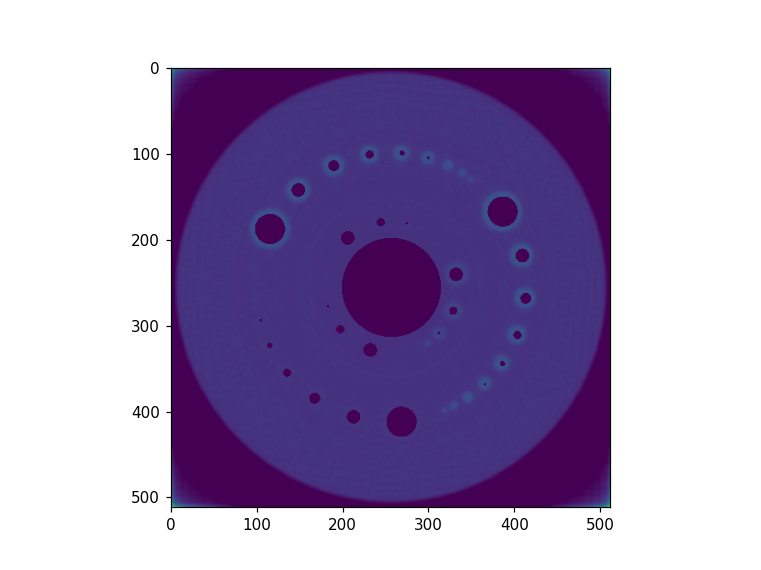

<IPython.core.display.Javascript object>


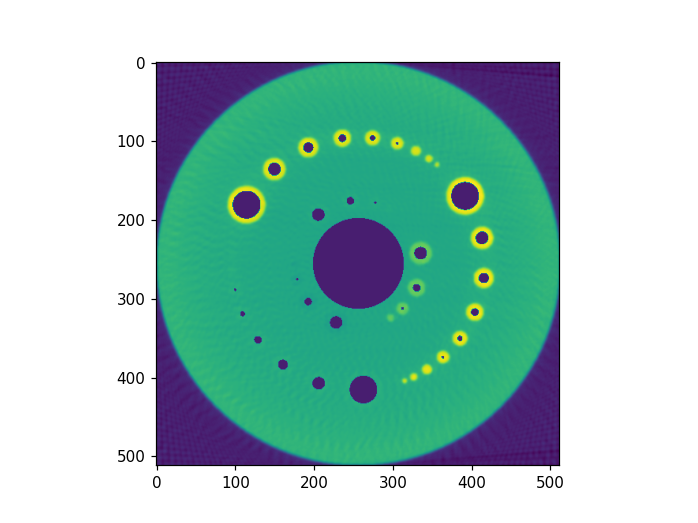

In [169]:
plt.figure()
plt.imshow(im)

plt.figure()
plt.imshow(imfc)

In [170]:
# plt.savefig('inserts_for_magdalena')

In [171]:
# im = topas.T[32]

# plt.figure()
# plt.subplot(121)
# plt.imshow(im2)
# plt.subplot(122)
# plt.imshow(im)

In [172]:
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

1.0461544
0.057178173


<IPython.core.display.Javascript object>


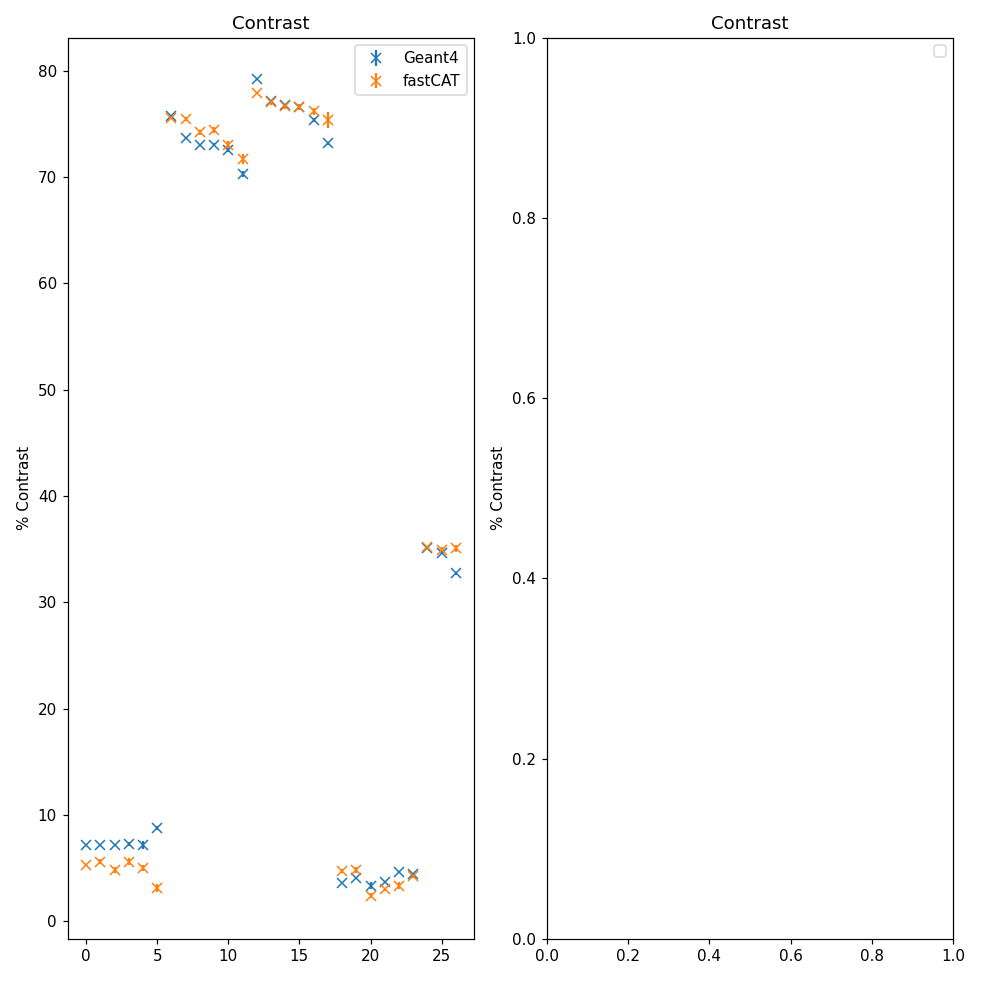

No handles with labels found to put in legend.


In [173]:
CNRs2 = analyse_515_8cm(topas.T[32])
CNRs1 = analyse_515(fastCat[5])

fig = plt.figure(figsize=[9,9])

subfig9 = fig.add_subplot(121)
subfig10 = fig.add_subplot(122)

phan_map = ['air','water','G4_LUNG_ICRP',"G4_BONE_COMPACT_ICRU","G4_BONE_CORTICAL_ICRP","G4_ADIPOSE_TISSUE_ICRP","G4_BRAIN_ICRP","G4_B-100_BONE"]

subfig9.errorbar(np.arange(len(CNRs1[1])),CNRs1[1],yerr=CNRs1[3],fmt= 'x',label='Geant4') #abel=f'{det.get()}, {load.get()}')
# subfig9.set_xticks(range(len(CNRs1))) 
# subfig9.set_xticklabels(phan_map[2:], fontsize=12, rotation = 75)
subfig9.set_ylabel('% Contrast')
subfig9.set_title('Contrast')

subfig9.errorbar(np.arange(len(CNRs2[1])),CNRs2[1],yerr=CNRs2[3],fmt= 'x',label='fastCAT')#abel=f'{det.get()}, {load.get()}')
# subfig10.set_xticks(range(len(CNRs1))) 
# subfig10.set_xticklabels(phan_map[2:], fontsize=12, rotation = 75)
subfig9.legend()
subfig10.set_ylabel('% Contrast')
subfig10.set_title('Contrast')

plt.legend()
fig.tight_layout()
  

In [63]:
np.std = np.nanstd

In [64]:
astd = []

astd.append(np.std(CNRs1[1][:8]))
astd.append(np.std(CNRs1[1][8:16]))
astd.append(np.std(CNRs1[1][16:24]))
astd.append(np.std(CNRs1[1][24:28]))
astd.append(np.std(CNRs1[1][28:32]))
astd.append(np.std(CNRs1[1][32:36]))
         
a2std = []

a2std.append(np.std(CNRs2[1][:8]))
a2std.append(np.std(CNRs2[1][8:16]))
a2std.append(np.std(CNRs2[1][16:24]))
a2std.append(np.std(CNRs2[1][24:28]))
a2std.append(np.std(CNRs2[1][28:32]))
a2std.append(np.std(CNRs2[1][32:36]))

/home/xcite/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [65]:
np.mean = np.nanmean

In [66]:
a = []

a.append(np.mean(CNRs1[1][:8]))
a.append(np.mean(CNRs1[1][8:16]))
a.append(np.mean(CNRs1[1][16:24]))
a.append(np.mean(CNRs1[1][24:28]))
a.append(np.mean(CNRs1[1][28:32]))
a.append(np.mean(CNRs1[1][32:36]))
         
a2 = []

a2.append(np.mean(CNRs2[1][:8]))
a2.append(np.mean(CNRs2[1][8:16]))
a2.append(np.mean(CNRs2[1][16:24]))
a2.append(np.mean(CNRs2[1][24:28]))
a2.append(np.mean(CNRs2[1][28:32]))
a2.append(np.mean(CNRs2[1][32:36]))

/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


<IPython.core.display.Javascript object>


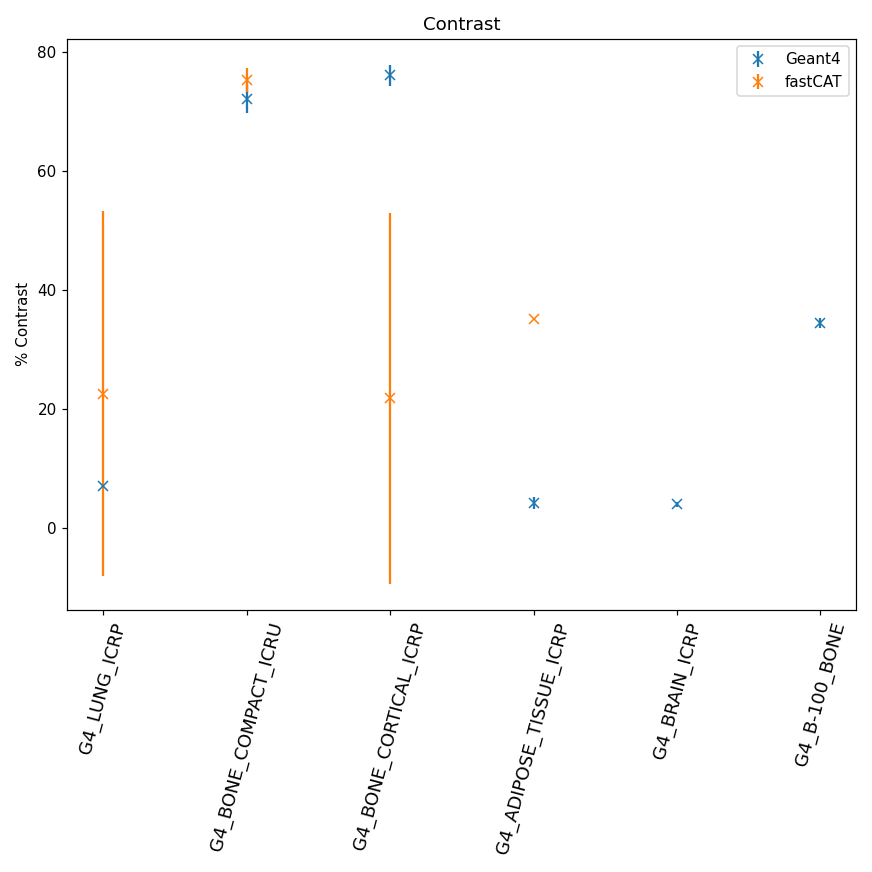

In [67]:
fig = plt.figure(figsize=[8,8])

subfig9 = fig.add_subplot(111)
# subfig10 = fig.add_subplot(122)

In [68]:
phan_map = ['air','water','G4_LUNG_ICRP',"G4_BONE_COMPACT_ICRU","G4_BONE_CORTICAL_ICRP","G4_ADIPOSE_TISSUE_ICRP","G4_BRAIN_ICRP","G4_B-100_BONE"]

subfig9.errorbar(np.arange(len(a)),a,astd,fmt= 'x',label='Geant4') #abel=f'{det.get()}, {load.get()}')
# subfig9.set_xticks(range(len(CNRs1))) 
# subfig9.set_xticklabels(phan_map[2:], fontsize=12, rotation = 75)
subfig9.set_ylabel('% Contrast')
subfig9.set_title('Contrast')

subfig9.errorbar(np.arange(len(a2)),a2,a2std,fmt= 'x',label='fastCAT')#abel=f'{det.get()}, {load.get()}')
subfig9.set_xticks(range(len(a))) 
subfig9.set_xticklabels(phan_map[2:], fontsize=12, rotation = 75)
subfig9.set_ylabel('% Contrast')
subfig9.set_title('Contrast')
subfig9.legend()

fig.tight_layout()
  

In [31]:
plt.savefig('Contrast_comparison_w_legend')